In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
%matplotlib inline

In [3]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [4]:
disp_figs = True

In [5]:
M = 4 # Number of Spiking motifs
N = 10 # Number of input neurons
D = 31 # temporal depth of receptive field
T = 1000
dt = 1
nrn_fr = 40 # hz
pg_fr = 4 # hz
background_noise_fr = 0 # h

np.random.seed(41)

In [6]:
# for matplotlib
colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
len(colors)

10

# Generate the PG Kernels


In [7]:
# I will try and do this with dense and sparse representations at the same time
# Dense K: matrix of binary images of sizeNxDxM
# Sparse K: set of (delay d, neuron a, and pg b)

K_dense = np.random.randint(0,999,(N,D,M))
K_dense[K_dense < nrn_fr] = 1
K_dense[K_dense >= nrn_fr] = 0
K_sparse = np.where(K_dense)

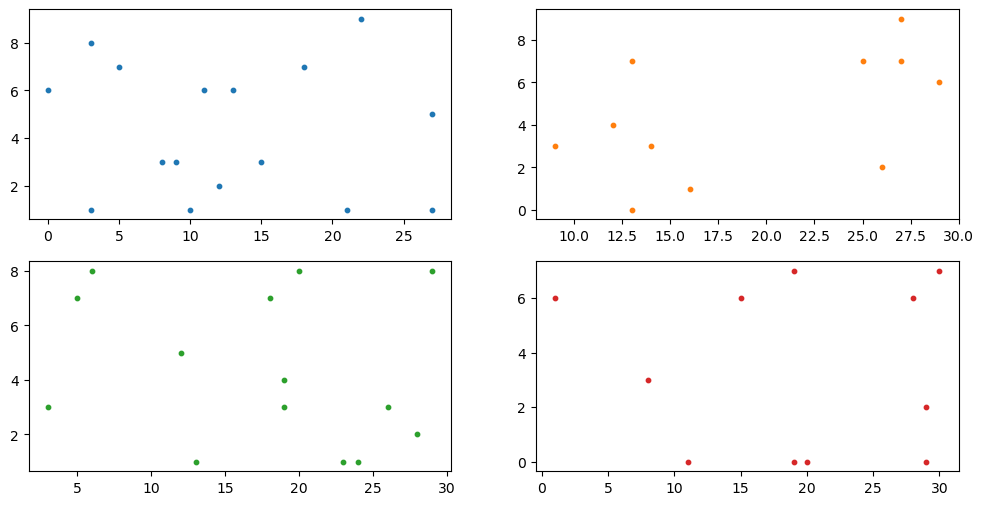

In [8]:

if disp_figs:
    %matplotlib inline
    fig,ax = plt.subplot_mosaic('AB;CD',figsize=(12,6))
    [ax[k].scatter(K_sparse[1][K_sparse[2]==i], K_sparse[0][K_sparse[2]==i],c=colors[i],s=10) for i,k in enumerate(['A','B','C','D'])]

# Generate the PG occurrences


In [9]:
# I suppose I can also do this in sparse and dense
# dense B: the binary image of the occurrences of the spiking motif as a ( M x T) matrix
# spare B: set of all times t and pg's b
B_dense = np.random.randint(0,999,(M,T))
B_dense[B_dense < pg_fr] = 1
B_dense[B_dense >= pg_fr] = 0
B_sparse = np.where(B_dense)

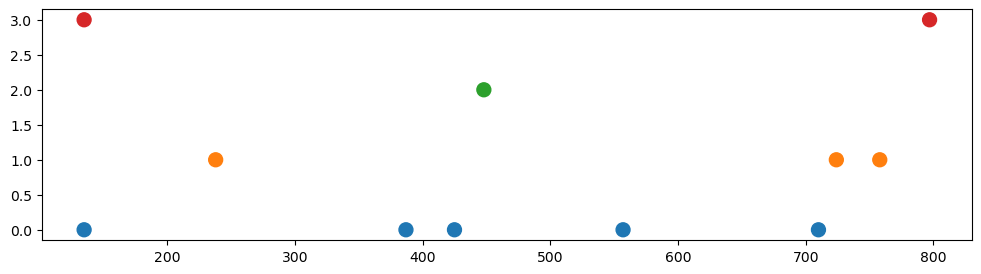

In [10]:
plt.figure(figsize=(12,3))
plt.scatter(B_sparse[1],B_sparse[0],c=colors[B_sparse[0]],s=100)
plt.show()

# Convolve the PG kernels with the PG firing times

In [11]:
# now to make the full raster plot keeping the labels in-tact
# dense A: the layered binary images of all neuron spikes by PG ( N x T x M
A_dense = np.zeros((N,T+D,M+1))
A_dense[...,-1] = np.random.randint(0,999,(N,T+D))
A_dense[...,-1] = (A_dense[...,-1] < background_noise_fr).astype('int')
for i in range(len(B_sparse[0])):
    t = B_sparse[1][i]
    b = B_sparse[0][i]
    A_dense[:, t:t+D, b] += K_dense[...,b]
    
A_dense.shape
# A_dense = A_dense[:,:1000,:]
A_sparse = np.where(A_dense)
A_dense = np.sum(A_dense,axis=2)
A_dense[A_dense>1] = 1
A_dense.shape

(10, 1031)

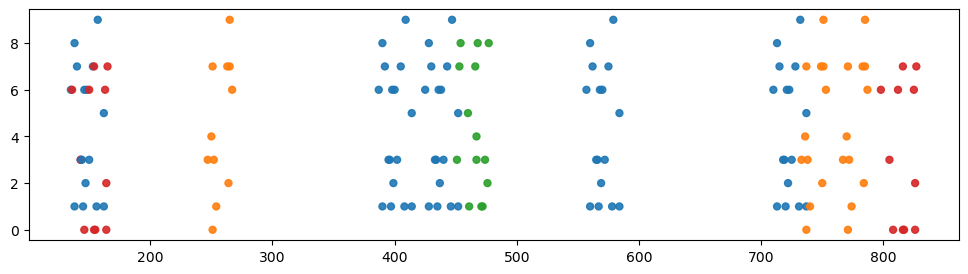

In [12]:
%matplotlib inline
plt.figure(figsize=(12,3))
plt.scatter(A_sparse[1],A_sparse[0],c=colors[A_sparse[2]],alpha=0.9,s=100,marker='.')
plt.show()

# Sanity Check

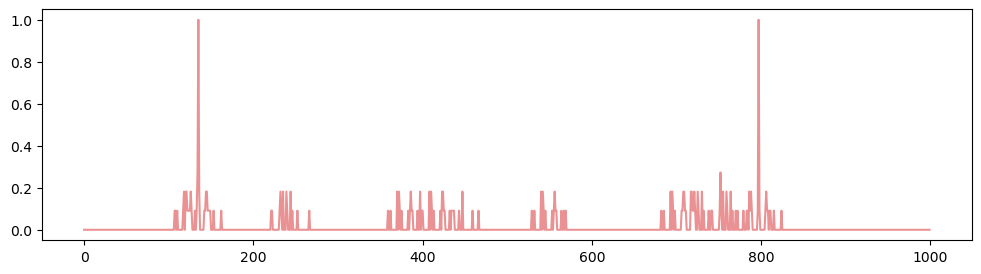

In [13]:
test = np.zeros((T,M))
%matplotlib inline
for j in range(M):
    for i in range(T):
        test[i,j] = np.sum(K_dense[...,j]*A_dense[:,i:i+D])
    test[:,j] = test[:,j]/np.max(test[:,j])
plt.figure(figsize=(12,3))
i = 3
plt.plot(test[:,i],color=colors[i],alpha=0.5)

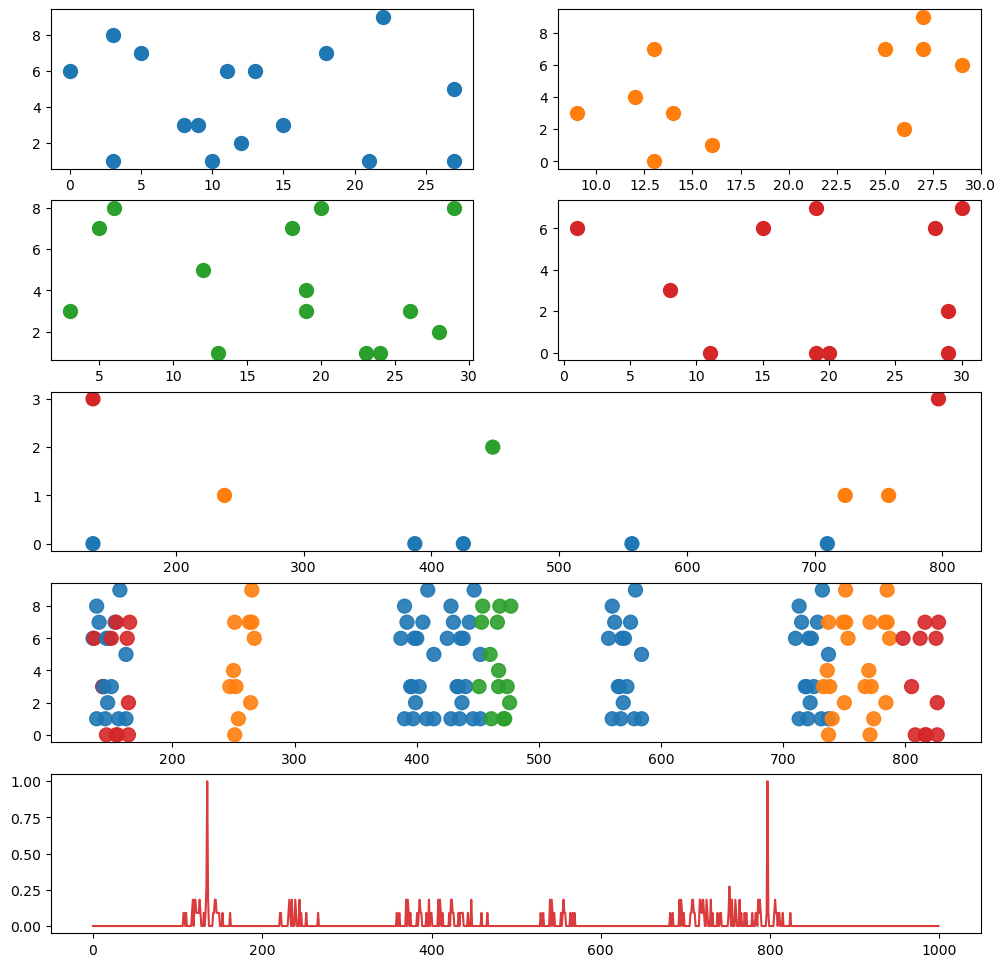

In [27]:

fig,ax = plt.subplot_mosaic('AB;CD;EE;FF;GG',figsize=(12,12))
[ax[k].scatter(K_sparse[1][K_sparse[2]==i], K_sparse[0][K_sparse[2]==i],c=colors[i],s=100) for i,k in enumerate(['A','B','C','D'])]
ax['E'].scatter(B_sparse[1],B_sparse[0],c=colors[B_sparse[0]],s=100)
ax['F'].scatter(A_sparse[1],A_sparse[0],c=colors[A_sparse[2]],alpha=0.9,s=400,marker='.')
ax['G'].plot(test[:,i],color=colors[i],alpha=0.9)
plt.show()

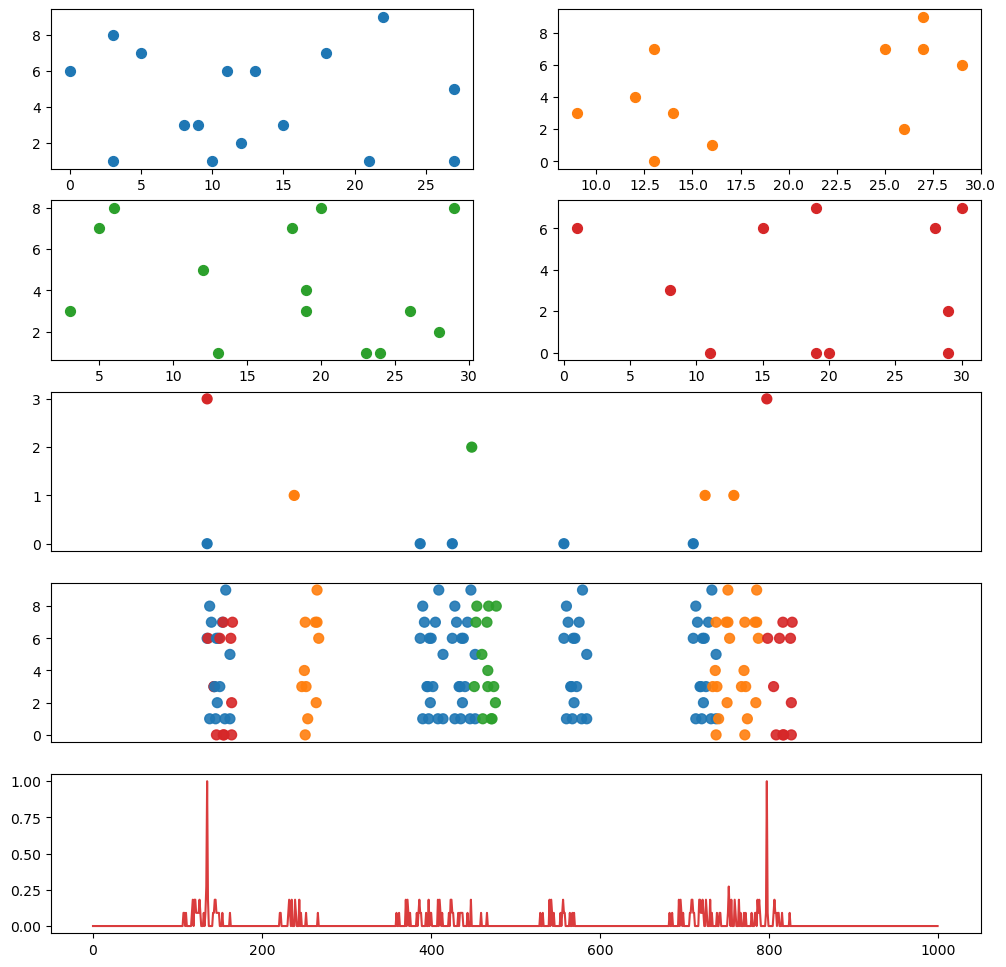

In [55]:
'''
as usual chatpgt makes my code more elegant...
'''


fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s=50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)

# Scatter plot for E
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.show()

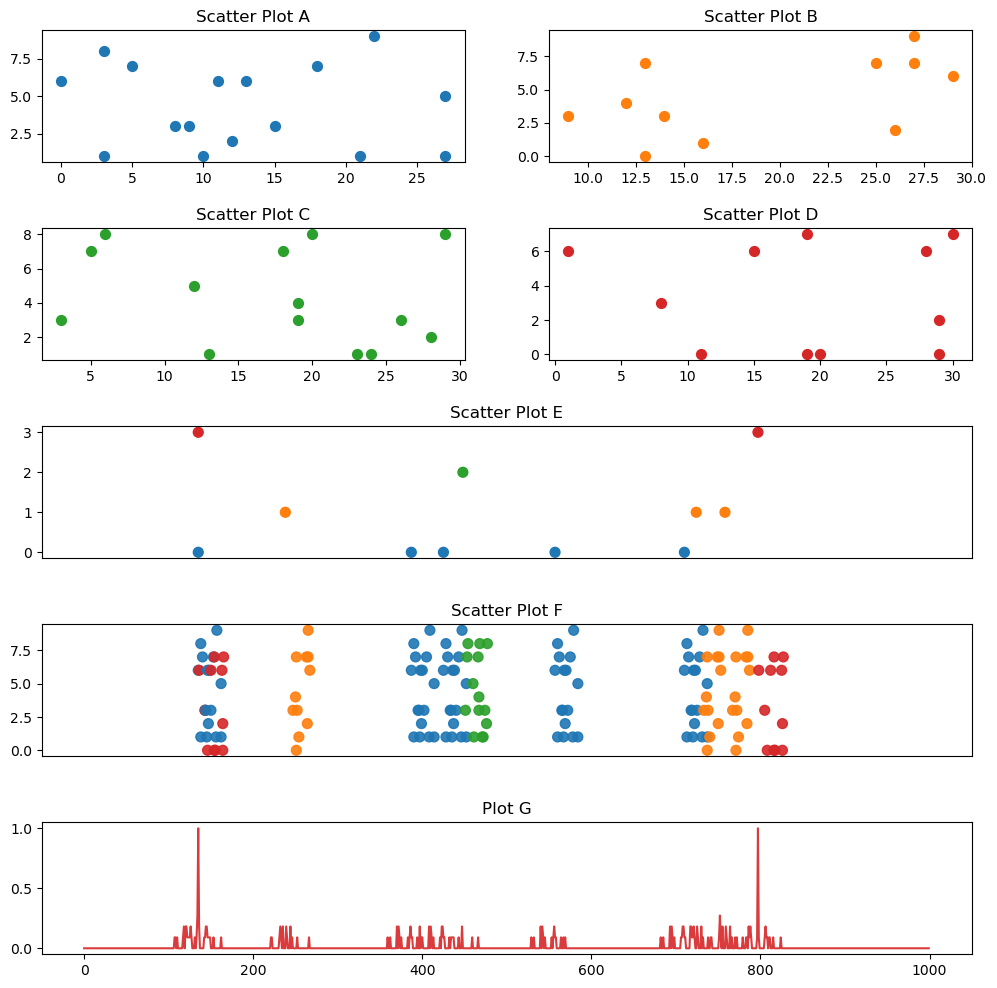

In [56]:
fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Scatter Plot {k}')

# Scatter plot for E
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Scatter Plot E')

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Scatter Plot F')

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Plot G')

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


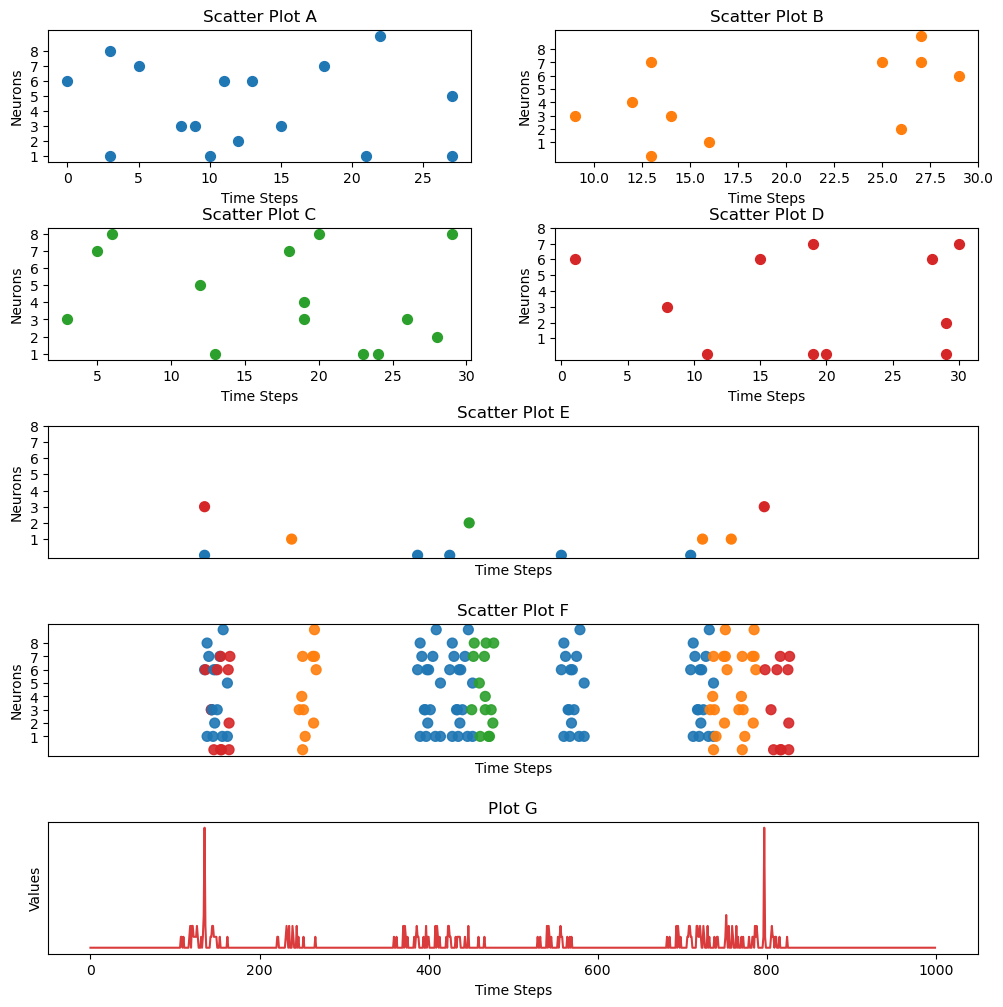

In [57]:
fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Scatter Plot {k}')
    ax[k].set_xlabel('Time Steps')
    ax[k].set_ylabel('Neurons')
    ax[k].set_yticks(range(1, 9))

# Scatter plot for E
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Scatter Plot E')
ax['E'].set_xlabel('Time Steps')
ax['E'].set_ylabel('Neurons')
ax['E'].set_yticks(range(1, 9))

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Scatter Plot F')
ax['F'].set_xlabel('Time Steps')
ax['F'].set_ylabel('Neurons')
ax['F'].set_yticks(range(1, 9))

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Plot G')
ax['G'].set_xlabel('Time Steps')
ax['G'].set_ylabel('Values')  # Replace 'Values' with an appropriate label for y-axis
ax['G'].set_yticks([])  # Remove y-axis ticks for plot G

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


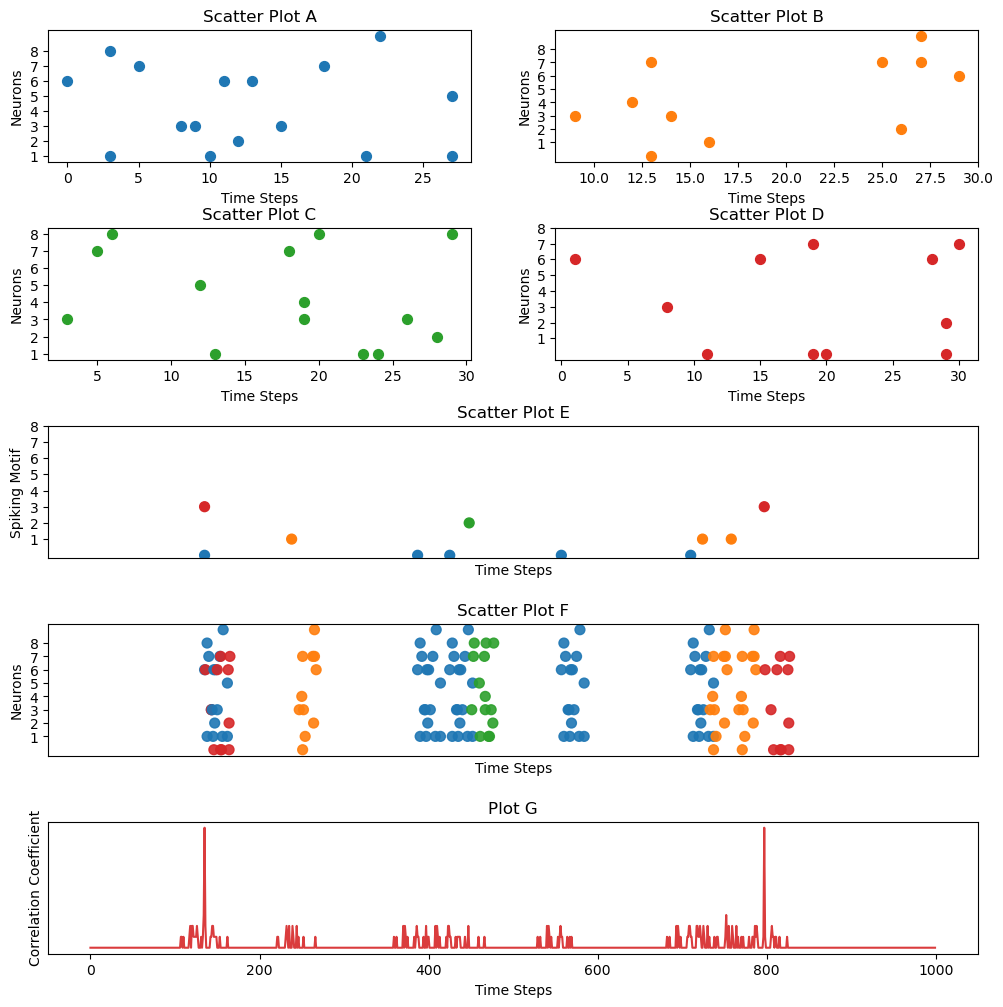

In [58]:
fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Scatter Plot {k}')
    ax[k].set_xlabel('Time Steps')
    ax[k].set_ylabel('Neurons')
    ax[k].set_yticks(range(1, 9))

# Scatter plot for E
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Scatter Plot E')
ax['E'].set_xlabel('Time Steps')
ax['E'].set_ylabel('Spiking Motif')  # Updated y-axis label for plot E
ax['E'].set_yticks(range(1, 9))

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Scatter Plot F')
ax['F'].set_xlabel('Time Steps')
ax['F'].set_ylabel('Neurons')
ax['F'].set_yticks(range(1, 9))

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Plot G')
ax['G'].set_xlabel('Time Steps')
ax['G'].set_ylabel('Correlation Coefficient')  # Updated y-axis label for plot G
ax['G'].set_yticks([])  # Remove y-axis ticks for plot G

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


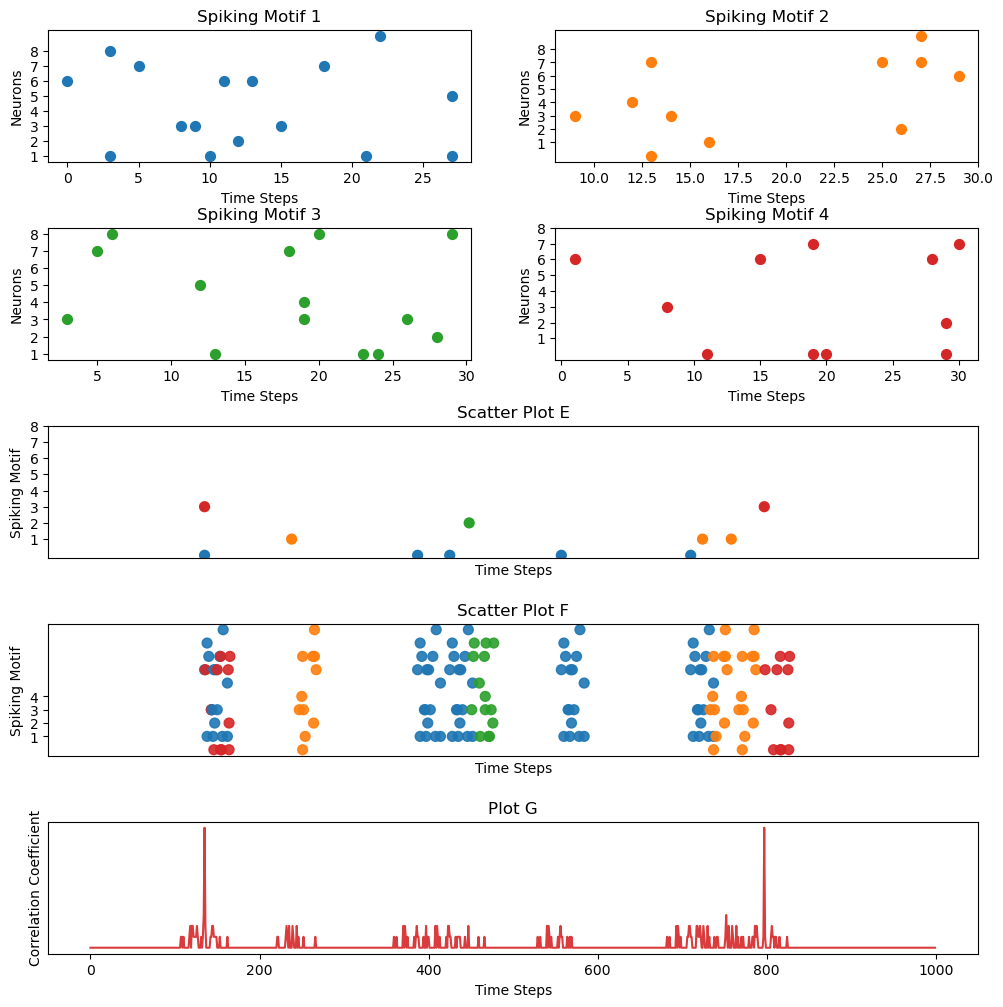

In [59]:
fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Spiking Motif {i + 1}')  # Updated title for plots A, B, C, D
    ax[k].set_xlabel('Time Steps')
    ax[k].set_ylabel('Neurons')
    ax[k].set_yticks(range(1, 9))

# Scatter plot for E
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Scatter Plot E')
ax['E'].set_xlabel('Time Steps')
ax['E'].set_ylabel('Spiking Motif')  # Updated y-axis label for plot E
ax['E'].set_yticks(range(1, 9))

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Scatter Plot F')
ax['F'].set_xlabel('Time Steps')
ax['F'].set_ylabel('Spiking Motif')  # Updated y-axis label for plot F
ax['F'].set_yticks(range(1, 5))  # Set y-axis ticks for plot F to represent 4 Spiking Motifs

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Plot G')
ax['G'].set_xlabel('Time Steps')
ax['G'].set_ylabel('Correlation Coefficient')  # Updated y-axis label for plot G
ax['G'].set_yticks([])  # Remove y-axis ticks for plot G

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


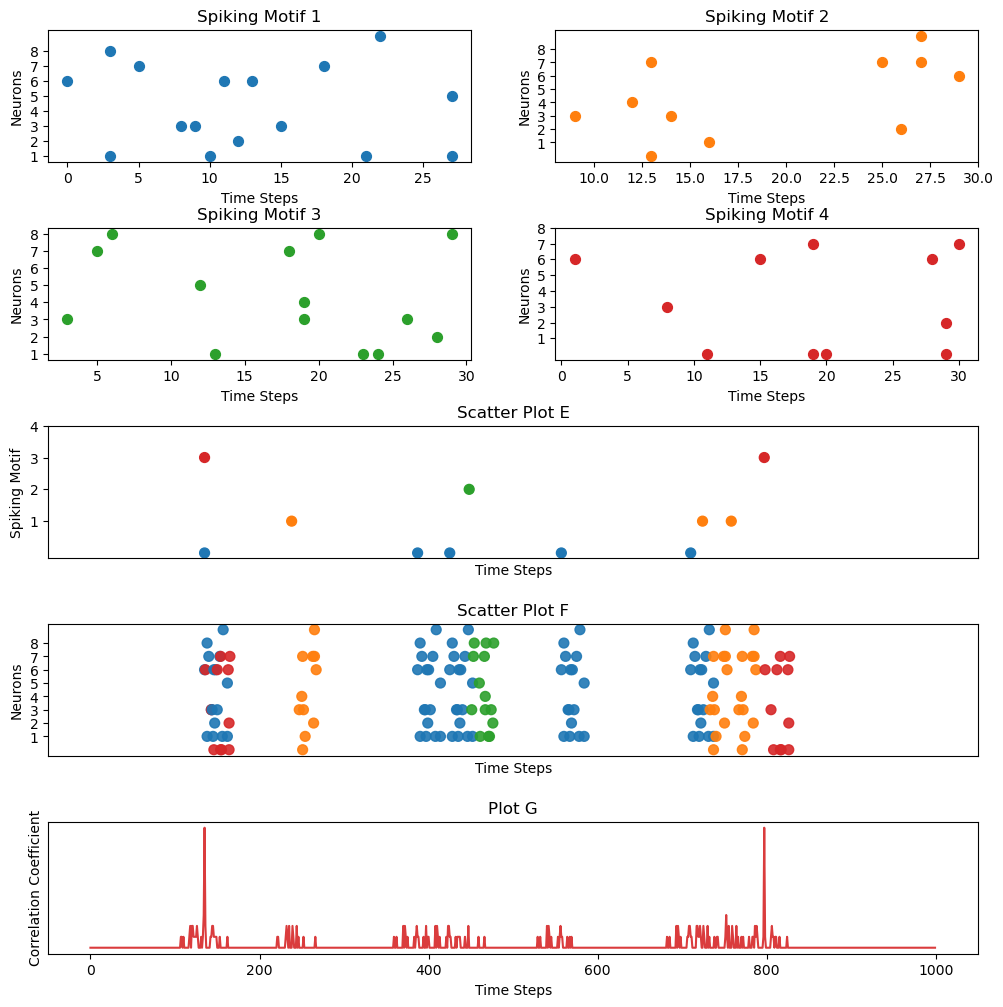

In [63]:
fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Spiking Motif {i + 1}')  # Updated title for plots A, B, C, D
    ax[k].set_xlabel('Time Steps')
    ax[k].set_ylabel('Neurons')
    ax[k].set_yticks(range(1, 9))

# Scatter plot for E
spiking_motif_data = [B_sparse[0][B_sparse[1] == i] for i in range(4)]  # Collect data for each Spiking Motif
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Scatter Plot E')
ax['E'].set_xlabel('Time Steps')
ax['E'].set_ylabel('Spiking Motif')  # Updated y-axis label for plot E
ax['E'].set_yticks(range(1, 5))  # Set y-axis ticks for plot E to represent the four Spiking Motifs

# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Scatter Plot F')
ax['F'].set_xlabel('Time Steps')
ax['F'].set_ylabel('Neurons')  # Y-axis represents neurons, no need to update y-axis label
ax['F'].set_yticks(range(1, 9))  # Set y-axis ticks for plot F to represent neurons

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Plot G')
ax['G'].set_xlabel('Time Steps')
ax['G'].set_ylabel('Correlation Coefficient')  # Updated y-axis label for plot G
ax['G'].set_yticks([])  # Remove y-axis ticks for plot G

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


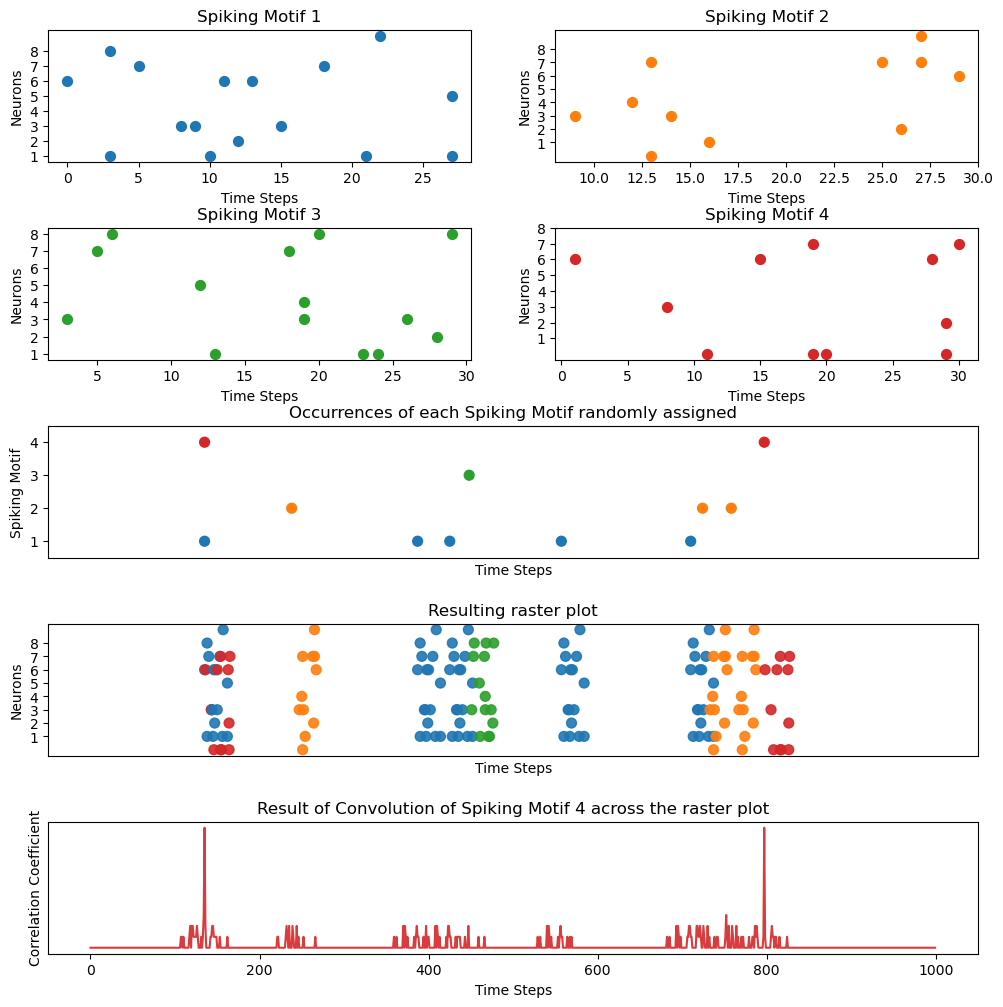

In [71]:
import matplotlib.ticker as ticker

fig, ax = plt.subplot_mosaic('AB;CD;EE;FF;GG', figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]})

s = 50

# Scatter plots for A, B, C, D
for i, k in enumerate(['A', 'B', 'C', 'D']):
    ax[k].scatter(K_sparse[1][K_sparse[2] == i], K_sparse[0][K_sparse[2] == i], c=colors[i], s=s)
    ax[k].set_title(f'Spiking Motif {i + 1}')  # Updated title for plots A, B, C, D
    ax[k].set_xlabel('Time Steps')
    ax[k].set_ylabel('Neurons')
    ax[k].set_yticks(range(1, 9))

spiking_motif_data = [B_sparse[0][B_sparse[1] == i] for i in range(4)]  # Collect data for each Spiking Motif
ax['E'].scatter(B_sparse[1], B_sparse[0], c=colors[B_sparse[0]], s=s)
ax['E'].set_title('Occurrences of each Spiking Motif randomly assigned')
ax['E'].set_xlabel('Time Steps')
ax['E'].set_ylabel('Spiking Motif')  # Updated y-axis label for plot E

# Set y-axis ticks and labels explicitly for Spiking Motifs 1 to 4
ax['E'].set_yticks(range(0, 4))  # Set y-axis ticks for plot E to represent the four Spiking Motifs
ax['E'].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x) + 1}'))  # Map y-axis labels to display 1 through 4
ax['E'].set_ylim(-0.5, 3.5)  # Set y-axis limits to display only the ticks and labels for the existing values


# Scatter plot for F
ax['F'].scatter(A_sparse[1], A_sparse[0], c=colors[A_sparse[2]], alpha=0.9, s=s*4, marker='.')
ax['F'].set_title('Resulting raster plot')
ax['F'].set_xlabel('Time Steps')
ax['F'].set_ylabel('Neurons')  # Y-axis represents neurons, no need to update y-axis label
ax['F'].set_yticks(range(1, 9))  # Set y-axis ticks for plot F to represent neurons

# Plot for G
ax['G'].plot(test[:, i], color=colors[i], alpha=0.9)
ax['G'].set_title('Result of Convolution of Spiking Motif 4 across the raster plot')
ax['G'].set_xlabel('Time Steps')
ax['G'].set_ylabel('Correlation Coefficient')  # Updated y-axis label for plot G
ax['G'].set_yticks([])  # Remove y-axis ticks for plot G

# Set common x-axis from 0 to 1000 with padding
common_xlim = (0, 1000)
padding = 50
ax['E'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['F'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)
ax['G'].set_xlim(common_xlim[0] - padding, common_xlim[1] + padding)

# Share x-axis for E, F, and G
ax['F'].sharex(ax['E'])
ax['G'].sharex(ax['E'])

# Hide x-axis ticks and labels for E and F
ax['E'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax['F'].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()
